# Modeling the Time Dilation Surface of a Schwarzschild black hole

In this project, I explored how time dilation near a Schwarzschild black hole (SBH) changes as a function of the black hole's mass, the velocity of the particle near the black hole, and the distance of the particle from the Schwarzschild radius. We'll consider a point particle that moves in the radial direction a distance $r$ from the Sch radius $R_s$ with a velocity $\beta$. Letting $\Delta t$ be the time interval measured by an observer far away ($r \rightarrow \infty$) from the black hole, we can write the combined effect of special relativistic time dilation and gravitational time dilation as 

$$ \Delta \tau = \Delta t \cdot \sqrt{ \left ( 1 - \frac{R_s}{r} \right ) \left ( 1 - \frac{\beta^{2}}{( 1 - R_s/r )^{2}} \right ) } $$

where $\Delta \tau$ is the time interval measured in the particle's rest frame, and $R_s$ is the Sch radius given by 

$$ R_s = \frac{2GM}{c^2} $$

where $M$ is the black hole mass. We note that $\Delta \tau$ depends on the black hole mass, the velocity of the particle near the black hole, and the distance of the particle from the Sch radius. To visualize these dependancies, this project builds simple animations of the time dilation surface as a function of $M$, $r$, and $\beta$. 

In [2]:
# First, we'll start by making some simple plots of time dilation versus beta and r. Let's import some useful functions
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.cm as cm
from matplotlib.colors import LightSource
%matplotlib inline

from time_dilation import sch_rad, grav_dilation, lorentz_dilation, lorentz_grav_dilation 

In [3]:
# convenience function to convert solar masses to kg
def solarMass_to_kg(solar_mass):
    return solar_mass*2e30 

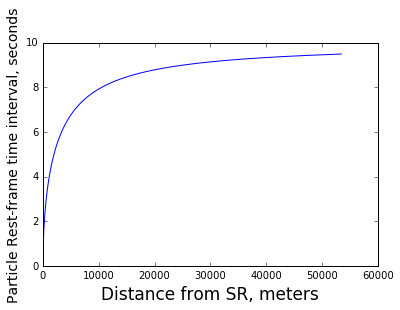

In [3]:
# We've defined various time dilation functions in the file time_dilation.py. We'll test those here. 

# gravitational time dilation of a massive particle at rest as a function of radial distance r from EH 
far_time = 10 # observer time interval, in seconds 
hole_mass = solarMass_to_kg(2) # mass 
epsilon = 1e-6 # for numerical stability 

# compute the Schwarschild radius 
s_rad = sch_rad(hole_mass)

radius = np.arange(s_rad + epsilon, 10*s_rad) # radii, in meters 
plt.plot(radius - s_rad, grav_dilation(s_rad, radius, far_time))
plt.xlabel("Distance from SR, meters", size=17)
plt.ylabel("Particle Rest-frame time interval, seconds", size=14)

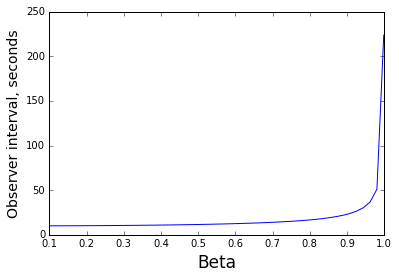

In [4]:
# next, Lorentz time dilation due to some velocity beta at a fixed radius far from the black hole 
# this should be very familiar to everyone! 
rest_frame_interval = 10 # interval in particle's rest frame, in seconds 
beta = np.linspace(0.1, 0.999)
plt.plot(beta, lorentz_dilation(beta, rest_frame_interval))
plt.xlabel("Beta", size=17)
plt.ylabel("Observer interval, seconds", size=14)

Next, let's combine the effects of SR time dilation and gravitational time dilation. First, we'll hold two of the three variables constant (black hole mass, radial distance, velocity) and vary the third. 

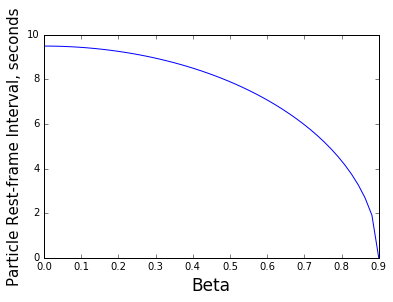

In [13]:
# plot of time interval vs. beta, for a given fixed radius and black hole mass  
hole_mass = solarMass_to_kg(2) # solar masses 
time_interval = 10 # seconds 

# Recompute Schw. radius (in case we want to use a different radius than above for the following cells)
s_rad = sch_rad(hole_mass)
beta = np.linspace(0 + epsilon, 0.9)
radius = 10*s_rad # here, the particle remains a distance x*s_rad away from the SR, where x is some number  

plt.plot(beta, lorentz_grav_dilation(beta, time_interval, s_rad, radius))
plt.xlabel("Beta", size=17)
plt.ylabel("Particle Rest-frame Interval, seconds", size=15)

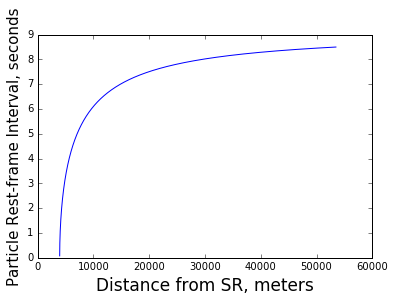

In [18]:
# plot of time interval vs. radius, for a given fixed beta and black hole mass 
hole_mass = solarMass_to_kg(2) # solar masses 
time_interval = 10 # seconds 
beta = 0.4 # velocity 

s_rad = sch_rad(hole_mass)
radius = np.arange(s_rad + epsilon, 10*s_rad) # radii, in meters  

plt.plot(radius - s_rad, lorentz_grav_dilation(beta, time_interval, s_rad, radius))
plt.xlabel("Distance from SR, meters", size=17)
plt.ylabel("Particle Rest-frame Interval, seconds", size=15)

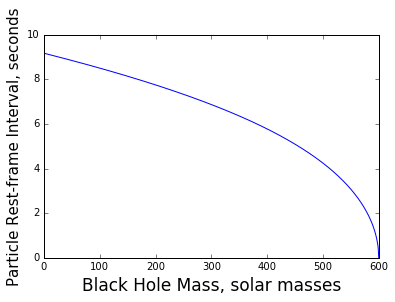

In [21]:
# finally, a plot of time interval vs. black hole mass, for a given fixed beta and radius 
# our fixed radius is some point far away from the minimum Sch radius considered 
solar_masses = np.linspace(1, 1e3, num=1000) # in solar masses
mass = solarMass_to_kg(solar_masses)
s_rad = sch_rad(mass)
time_interval = 10 # seconds 

beta = 0.4 
radius = 1000*s_rad[0] # in units of Sch radius 
plt.plot(solar_masses, lorentz_grav_dilation(beta, time_interval, s_rad, radius))
plt.xlabel("Black Hole Mass, solar masses", size=17)
plt.ylabel("Particle Rest-frame Interval, seconds", size=15)

Cool! Now let's see a basic 3D plot of the time dilation surface as a function of beta and radius (at fixed black hole mass). 

<IPython.core.display.Javascript object>


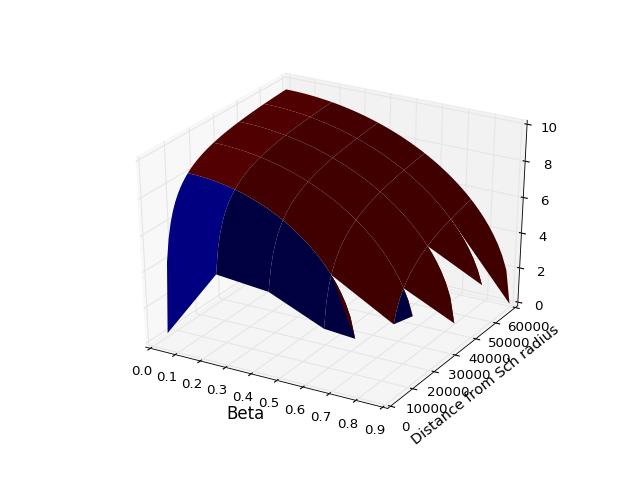

In [69]:
# 3D plot of lorentz_grav_dilation as a function of beta, radius 
hole_mass = solarMass_to_kg(2) # solar masses 
time_interval = 10 # seconds 

beta = np.linspace(0.0, 0.9)
s_rad = sch_rad(hole_mass)
radius = np.linspace(s_rad + epsilon, 10*s_rad)

#%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d') 
beta, radius = np.meshgrid(beta, radius)

dil = lorentz_grav_dilation(beta, time_interval, s_rad, radius)
grav_colors = cm.jet(dil)
grav_surf = ax.plot_surface(beta, radius, dil, facecolors=grav_colors,
                       linewidth=0, antialiased=True)
plt.xlabel("Beta", size=15)
plt.ylabel("Distance from Sch radius", size=13)

fig.set_size_inches(8,6)
plt.show()

An interesting question: what happens to this surface if we vary the black hole mass, or vary the "radius window" we're looking at? Let's take a look at the animations to find out! 

The animations don't work in iPython notebooks, so we'll run them from the command line.